In [1]:
!pip install rohub

In [1]:
import rohub
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'linear-elastic-plate-with-hole'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
import provenance
from generate_config import workflow_config

In [3]:
USE_DEVELOPMENT_VERSION = False

In [4]:
if USE_DEVELOPMENT_VERSION:
    rohub.settings.API_URL = "https://rohub2020-rohub.apps.paas-dev.psnc.pl/api/"
    rohub.settings.KEYCLOAK_CLIENT_ID = "rohub2020-cli"
    rohub.settings.KEYCLOAK_CLIENT_SECRET = "714617a7-87bc-4a88-8682-5f9c2f60337d"
    rohub.settings.KEYCLOAK_URL = "https://keycloak-dev.apps.paas-dev.psnc.pl/auth/realms/rohub/protocol/openid-connect/token"
    rohub.settings.SPARQL_ENDPOINT = "https://rohub2020-api-virtuoso-route-rohub.apps.paas-dev.psnc.pl/sparql/"

In [ ]:
username = ""
password = ""

rohub.login(username=username, password=password)

Logged successfully as mahdi.jafarkhani@tik.uni-stuttgart.de.


In [6]:
ANNOTATION_PREDICATE = "http://w3id.org/nfdi4ing/metadata4ing#investigates"
ANNOTATION_OBJECT = "https://github.com/BAMresearch/NFDI4IngModelValidationPlatform/tree/main/benchmarks/linear-elastic-plate-with-hole"

In [9]:
RO  =  rohub.ros_load("8de7c8c8-c61d-46d9-a30e-ff80500f0f95")
annotation_json  = [
	{
		"property": ANNOTATION_PREDICATE,
		"value": ANNOTATION_OBJECT
	}
]
add_annotations_result = RO.add_annotations(body_specification_json=annotation_json)

print(add_annotations_result)

Research Object was successfully loaded with id = 8de7c8c8-c61d-46d9-a30e-ff80500f0f95
{'identifier': '7f3da12f-7ffa-4ce3-88ec-c83a3dd71b8d', 'shared_link': 'https://w3id.org/ro-id/8de7c8c8-c61d-46d9-a30e-ff80500f0f95/annotations/7f3da12f-7ffa-4ce3-88ec-c83a3dd71b8d', 'name': 'annotations/7f3da12f-7ffa-4ce3-88ec-c83a3dd71b8d', 'filename': '.ro/annotations/7f3da12f-7ffa-4ce3-88ec-c83a3dd71b8d.ttl', 'relation': False, 'read_only': False, 'target': '8de7c8c8-c61d-46d9-a30e-ff80500f0f95', 'ro': '8de7c8c8-c61d-46d9-a30e-ff80500f0f95', 'resources': [], 'created': '2025-11-24T14:42:20.243758+0000', 'creator': 'mahdi.jafarkhani@tik.uni-stuttgart.de', 'modificator': None, 'modified': '2025-11-24T14:42:20.243702+0000', 'is_dmp': True, 'is_system': False, 'api_link': 'https://api.rohub.org/api/annotations/7f3da12f-7ffa-4ce3-88ec-c83a3dd71b8d/'}


In [7]:
UUID_QUERY = f"""
SELECT ?subject 
WHERE {{
  ?subject <{ANNOTATION_PREDICATE}> <{ANNOTATION_OBJECT}> .
}}
"""

uuid_result = rohub.query_sparql_endpoint(UUID_QUERY, endpoint_url=rohub.settings.SPARQL_ENDPOINT)

if not uuid_result.empty:
    research_object_iri = uuid_result.iloc[0]["subject"]
    UUID = research_object_iri.split('/')[-1]
    print(f"Found Research Object UUID: {UUID}")
else:
    print("No results found")

Found Research Object UUID: 8de7c8c8-c61d-46d9-a30e-ff80500f0f95


In [17]:
print(rohub.is_job_success(job_id="f42af82e-cd57-4bf2-a9bc-f926f980cea3"))

{'identifier': 'f42af82e-cd57-4bf2-a9bc-f926f980cea3', 'created_by': 'mahdi.jafarkhani@tik.uni-stuttgart.de', 'created_on': '2025-11-25T14:45:15.727933+0000', 'started_on': '2025-11-25T14:45:15.799679+0000', 'finished_on': '2025-11-25T14:46:32.228534+0000', 'operation': 'RO_ZIP_UPLOAD', 'status': 'SUCCESS', 'input': 'metadata4ing_provenance.zip', 'output': 'Task done successfully', 'results': 'https://api.rohub.org/api/ros/831f289b-ac90-446b-b097-51f259609d6d/', 'warnings': None, 'queuing': '0.071746', 'execution': '76.428855', 'progress': 100, 'api_link': 'https://api.rohub.org/api/jobs/f42af82e-cd57-4bf2-a9bc-f926f980cea3/'}


In [ ]:
import  rohub

research_areas  = ["Environmental research"]
title  =  "NFDI4ING Model Validation with NextFlow"
description  =  f"Description for {title}"
zip_path = "/Users/mahdi/Downloads/metadata4ing_provenance.zip"
RO  =  rohub.ros_upload(path_to_zip=zip_path)
print(f"Identifier: {RO.identifier}")

In [24]:
UUID = "831f289b-ac90-446b-b097-51f259609d6d"
NAMED_GRAPH_QUERY = f"""
PREFIX schema: <http://schema.org/>
SELECT ?graph WHERE {{
    GRAPH ?graph {{ <https://w3id.org/ro-id/{UUID}> a schema:Dataset . }}
}}
"""

named_graph_result = rohub.query_sparql_endpoint(NAMED_GRAPH_QUERY)

if not named_graph_result.empty:
    named_graph = named_graph_result.iloc[0]["graph"]
    print(f"Found Named Graph: {named_graph}")
else:
    print("No results found")

Found Named Graph: https://w3id.org/ro-id/831f289b-ac90-446b-b097-51f259609d6d/.ro/annotations/6f7d52e9-dcaf-4695-b321-b728604d8dca.ttl


In [30]:
tools = workflow_config["tools"]
analyzer = provenance.ProvenanceAnalyzer(tools=tools)
PROVENANCE_QUERY = analyzer.generate_query_string(named_graph=named_graph)
print(PROVENANCE_QUERY)


            
        PREFIX schema: <http://schema.org/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX m4i: <http://w3id.org/nfdi4ing/metadata4ing#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX ssn: <http://www.w3.org/ns/ssn/>
        
            SELECT DISTINCT ?value_element_size ?value_max_von_mises_stress_gauss_points ?tool_name
            WHERE {
                GRAPH <https://w3id.org/ro-id/831f289b-ac90-446b-b097-51f259609d6d/.ro/annotations/6f7d52e9-dcaf-4695-b321-b728604d8dca.ttl> {
                    
          ?method a m4i:Method ;
                m4i:hasParameter ?element_size ;
                m4i:hasParameter ?element_order ;
                m4i:hasParameter ?element_degree ;
                m4i:investigates ?max_von_mises_stress_gauss_points ;
                ssn:implementedBy ?tool .
        
          ?max_von_mises_stress_gauss_points a schema:PropertyValue ;
                rdfs:label "max_von_mises_stress_

In [31]:
result = rohub.query_sparql_endpoint(PROVENANCE_QUERY)

In [32]:
table_data = []

headers = [
    "element-size",
    "max-mises-stress",
    "Tool Name"
]

if not result.empty:
    table_data = [
        [
            float(row["value_element_size"]),                   # element-size
            float(row["value_max_von_mises_stress_gauss_points"]),  # max-mises-stress
            row["tool_name"],                                   # Tool Name
        ]
        for _, row in result.iterrows()
    ]

    headers = [
        "element-size",
        "max_von_mises_stress_nodes",
        "Tool Name"
    ]

    # Choose your sort key depending on which column you want to sort by
    # Example: sort by element-size
    sort_key = 0   # index in table_data row → 0: element-size, 1: max-mises-stress, 2: Tool Name

    table_data.sort(key=lambda row: row[sort_key], reverse=False)

else:
    print("No results found")

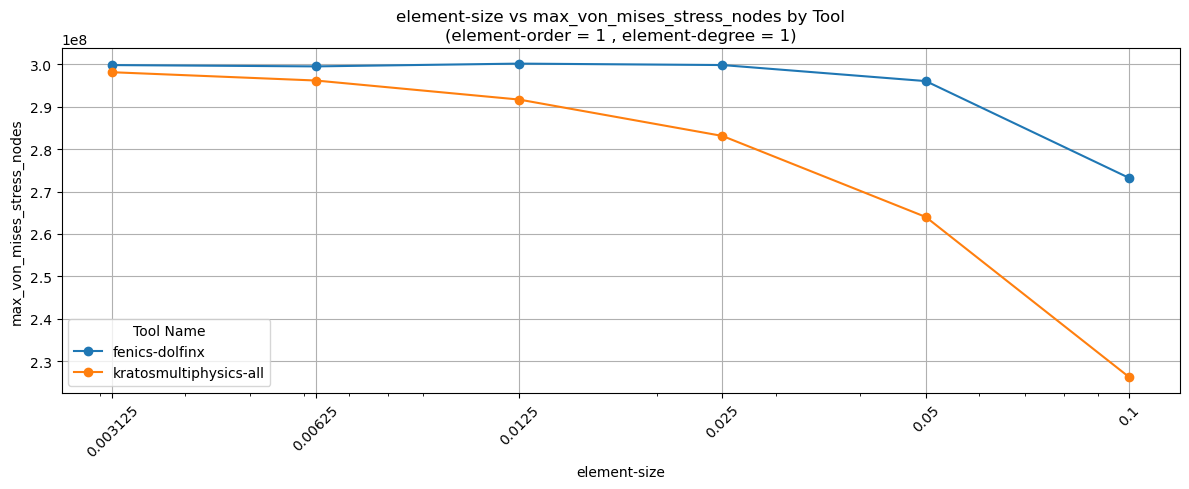

Plot saved to: None


In [33]:
analyzer.plot_element_size_vs_stress(table_data=table_data, headers=headers)